In [1]:
#Katie McLoughlin
#Understanding the housing property market in Ireland from 2010 to 2021

#Import useful packages to support the script 

import pandas as pd # Analytical function 
import numpy as np # Lanugauges for ansyltics  
import matplotlib.pyplot as plt #visualisation tool 
import seaborn as sns#visualisation tool 
import csv


In [2]:
DS = pd.read_csv(r"C:\Users\mcloukx1\Downloads\Assignment-UCD\Property_2021.csv") 
# Import .cvs dataset as DS, short for Dataset
# This dataset is from Kaggle.com/datasets
# This dataset contains the Irish housing property sales market from 2010 to 2021

In [3]:
DS.shape
#Dataset size, rows 476745 by 9 columns
#need to run analysis on dataset to check if all 9 rows contain 476745 rows of data. 

(476745, 9)

In [4]:
DS.info()
#print out of the dataset information understand the data more and helps support the analysis
# Within the 9 Columns, 7 columns contain all complete data, 476745 entries 
# 3 variations in data types



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476745 entries, 0 to 476744
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SALE_DATE           476745 non-null  object 
 1   ADDRESS             476745 non-null  object 
 2   POSTAL_CODE         89764 non-null   object 
 3   COUNTY              476745 non-null  object 
 4   SALE_PRICE          476745 non-null  float64
 5   IF_MARKET_PRICE     476745 non-null  int64  
 6   IF_VAT_EXCLUDED     476745 non-null  int64  
 7   PROPERTY_DESC       476745 non-null  object 
 8   PROPERTY_SIZE_DESC  52792 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 32.7+ MB


In [5]:
DS.head(15) 
#Printout of the Dataset, first 15 rows for visual of data

,SALE_DATE,ADDRESS,POSTAL_CODE,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,PROPERTY_SIZE_DESC
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,0,1,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
5,04/01/2010,"12 Sallymount Avenue, Ranelagh",NaN,Dublin,425000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
6,04/01/2010,"13 Oakleigh Wood, Dooradoyle, Limerick",NaN,Limerick,172500.0,0,0,Second-Hand Dwelling house /Apartment,NaN
7,04/01/2010,"13 The Drive, Chapelstown Gate, Tullow Road",NaN,Carlow,177500.0,0,0,Second-Hand Dwelling house /Apartment,NaN
8,04/01/2010,"15 Carriglawn, Waterpark, Carrigaline",NaN,Cork,180000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
9,04/01/2010,"15a Moore Bay, Kilkee",NaN,Clare,126500.0,0,0,Second-Hand Dwelling house /Apartment,NaN


In [6]:
DS.tail(15) 
#Printout of the Dataset, Last 15 rows for visual of data

,SALE_DATE,ADDRESS,POSTAL_CODE,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,PROPERTY_SIZE_DESC
476730,28/05/2021,"69 COIS NA HABHAINN, STATION RD, MOATE",NaN,Westmeath,210000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
476731,28/05/2021,"69B ORWELL PARK RISE, DUBLIN 6W",NaN,Dublin,330000.0,1,0,Second-Hand Dwelling house /Apartment,NaN
476732,28/05/2021,"7 AN MULLACH, CUL ARD, CORK",NaN,Cork,258000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
476733,28/05/2021,"7 KILLANE HEIGHTS, EDENDERRY, CO OFFALY",NaN,Offaly,300000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
476734,28/05/2021,"7 ST MARYS TCE, MIDLETON, CORK",NaN,Cork,156000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
476735,28/05/2021,"8 AGHNAHARNA COURT, STRADBALLY RD, SUMMERHILL",NaN,Laois,190000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
476736,28/05/2021,"92 WOODLANDS, DUNLEER, LOUTH",NaN,Louth,221000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
476737,28/05/2021,"BALLINASRAGH, LUSMAGH, BANAGHER",NaN,Offaly,175000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
476738,28/05/2021,"BALLYCAGHAN, KILCOCK, KILDARE",NaN,Kildare,690000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
476739,28/05/2021,"BELLEVILLE, ARTHURSTOWN, NEW ROSS",NaN,Wexford,250000.0,0,0,Second-Hand Dwelling house /Apartment,NaN


In [7]:
DS.columns
#Dataset Columns names 

Index(['SALE_DATE', 'ADDRESS', 'POSTAL_CODE', 'COUNTY', 'SALE_PRICE',
       'IF_MARKET_PRICE', 'IF_VAT_EXCLUDED', 'PROPERTY_DESC',
       'PROPERTY_SIZE_DESC'],
      dtype='object')

In [8]:
DS.describe()
#anslytics of dataset 

,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED
count,4.767450e+05,476745.000000,476745.000000
mean,2.590403e+05,0.048984,0.159618
std,8.526791e+05,0.215835,0.366252
min,5.030530e+03,0.000000,0.000000
25%,1.150000e+05,0.000000,0.000000
50%,1.950000e+05,0.000000,0.000000
75%,3.000000e+05,0.000000,0.000000
max,1.701428e+08,1.000000,1.000000


In [9]:
DS1= DS[['SALE_DATE', 'ADDRESS', 'COUNTY', 'SALE_PRICE','IF_MARKET_PRICE', 'IF_VAT_EXCLUDED', 'PROPERTY_DESC']]
#Filtered DS to new dataset called DS1. 
#Filtered out columns 'POSTAL_CODE' and 'PROPERTY_SIZE_DESC' as they didn't contain all rows of data and i do not require them as part of my analysis. 
#NSufficient information for the 'POSTAL Code' in Column 'ADDRESS' AND 'COUNTY'. Sufficient information for 'PROPERTY_SIZE_DESC' in column 'PROPERTY_DESC'



In [10]:
DS1.head(5)
#visual of new dataset DS1

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,0,1,New Dwelling house /Apartment
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment
3,04/01/2010,"1 The Haven, Mornington",Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment


In [11]:
DS1.shape
#Review of new dataset DS1

(476745, 7)

In [12]:
DS1.info()
#Review of new dataset DS1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476745 entries, 0 to 476744
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SALE_DATE        476745 non-null  object 
 1   ADDRESS          476745 non-null  object 
 2   COUNTY           476745 non-null  object 
 3   SALE_PRICE       476745 non-null  float64
 4   IF_MARKET_PRICE  476745 non-null  int64  
 5   IF_VAT_EXCLUDED  476745 non-null  int64  
 6   PROPERTY_DESC    476745 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 25.5+ MB


In [13]:
#Selection of '1' IF_VAT_EXCLUDED values, and add value of 0.135 (13.5%) x SALE_PRICE
#https://reddycharlton.ie/insights/vat-on-property/ reference for VAT on protperty -
# https://www.revenue.ie/en/vat/vat-rates/historical-vat-rates/index.aspx

In [14]:
Property_Market_2010_2021 = DS1.copy()
#created a copy of DS1

In [15]:
DS1.equals(Property_Market_2010_2021)
#checking the new dataset "Property_Market_2010_2021"is a copy of "DS1"

True

In [16]:
Property_Market_2010_2021.duplicated()
#checking all rows of data for duplicates in dataset
#no duplicate rows identified in dataset "Property_Market_2010_2021"

0         False
1         False
2         False
3         False
4         False
          ...  
476740    False
476741    False
476742    False
476743    False
476744    False
Length: 476745, dtype: bool

In [17]:
Property_Market_2010_2021.isnull() 
#checking that all datacells contain infomation 
#all datacells in "Property_Market_2010_2021" contain infomation for analysis

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
476740,False,False,False,False,False,False,False
476741,False,False,False,False,False,False,False
476742,False,False,False,False,False,False,False
476743,False,False,False,False,False,False,False


In [18]:
Property_Market_2010_2021.isnull().sum() 
#run report to determine if any 
#no missing datacells 

SALE_DATE          0
ADDRESS            0
COUNTY             0
SALE_PRICE         0
IF_MARKET_PRICE    0
IF_VAT_EXCLUDED    0
PROPERTY_DESC      0
dtype: int64

In [19]:
Property_Market_2010_2021.columns
#review of dataset columns names 

Index(['SALE_DATE', 'ADDRESS', 'COUNTY', 'SALE_PRICE', 'IF_MARKET_PRICE',
       'IF_VAT_EXCLUDED', 'PROPERTY_DESC'],
      dtype='object')

In [20]:
Property_Market_2010_2021.info()
#review of dataset infomation 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476745 entries, 0 to 476744
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SALE_DATE        476745 non-null  object 
 1   ADDRESS          476745 non-null  object 
 2   COUNTY           476745 non-null  object 
 3   SALE_PRICE       476745 non-null  float64
 4   IF_MARKET_PRICE  476745 non-null  int64  
 5   IF_VAT_EXCLUDED  476745 non-null  int64  
 6   PROPERTY_DESC    476745 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 25.5+ MB


In [21]:
Property_Market_2010_2021.head(2) 
#review of dataset 

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,0,1,New Dwelling house /Apartment


In [22]:
Property_Market_2010_2021['IF_VAT_EXCLUDED'] == 1
#couldnt get IF_VAT_EXCLUDED = 1 to be identied for a count 


    



0         False
1          True
2         False
3         False
4         False
          ...  
476740    False
476741    False
476742    False
476743    False
476744    False
Name: IF_VAT_EXCLUDED, Length: 476745, dtype: bool

In [23]:
Property_Market_2010_2021.drop(Property_Market_2010_2021.index[Property_Market_2010_2021['IF_VAT_EXCLUDED'] == "1"])

Property_Market_2010_2021.shape
#I couldnt get IF_VAT_EXCLUDED = 1 to be dropped

(476745, 7)

In [24]:
prop2 = Property_Market_2010_2021.copy()
prop2.head()
#I couldnt get IF_VAT_EXCLUDED = 1 to be dropped

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,0,1,New Dwelling house /Apartment
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment
3,04/01/2010,"1 The Haven, Mornington",Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment


In [25]:
Property_Market_2010_2021['YEAR'] = pd.to_datetime(Property_Market_2010_2021['SALE_DATE'], errors='coerce')
#Property_Market_2010_2021['YEAR'] = Property_Market_2010_2021['SALE_DATE'].dt.strftime('%Y')
Property_Market_2010_2021.columns
#created a new column called "YEAR" to contain the year data from "SALE_DATE"

Index(['SALE_DATE', 'ADDRESS', 'COUNTY', 'SALE_PRICE', 'IF_MARKET_PRICE',
       'IF_VAT_EXCLUDED', 'PROPERTY_DESC', 'YEAR'],
      dtype='object')

In [26]:
Property_Market_2010_2021.head()
#visual of date format in Table format
#Date format in new Column "YEAR" in YYYY-MM-DD format. Format required is YYYY

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,YEAR
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment,2010-01-01
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,0,1,New Dwelling house /Apartment,2010-03-01
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment,2010-04-01
3,04/01/2010,"1 The Haven, Mornington",Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment,2010-04-01
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment,2010-04-01


In [27]:
Property_Market_2010_2021['YEAR'] = pd.to_datetime(Property_Market_2010_2021.YEAR, format='%Y')
#2nd method to get new column called "YEAR" to contain the year data from "SALE_DATE", YYYY

In [28]:
Property_Market_2010_2021.head()
#visual of date format in Table format
#Date format in new Column "YEAR" in YYYY-MM-DD format. Format required is YYYY

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,YEAR
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment,2010-01-01
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,0,1,New Dwelling house /Apartment,2010-03-01
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment,2010-04-01
3,04/01/2010,"1 The Haven, Mornington",Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment,2010-04-01
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment,2010-04-01


In [29]:
Property_Market_2010_2021['YEAR'] = Property_Market_2010_2021['YEAR'].dt.strftime('%Y')
#3rd method to get new column called "YEAR" to contain the year data from "SALE_DATE", YYYY

In [30]:
Property_Market_2010_2021.head()
#visual of date format in Table format
#Date format in new Column "YEAR" is YYYY

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,YEAR
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment,2010
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,0,1,New Dwelling house /Apartment,2010
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment,2010
3,04/01/2010,"1 The Haven, Mornington",Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment,2010
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment,2010


In [31]:
for IF_VAT_EXCLUDED in Property_Market_2010_2021 : 
    print(IF_VAT_EXCLUDED)
    
    


SALE_DATE
ADDRESS
COUNTY
SALE_PRICE
IF_MARKET_PRICE
IF_VAT_EXCLUDED
PROPERTY_DESC
YEAR


In [32]:
Property_Market_2010_2021['SALE_PRICE_2'] =0 
Property_Market_2010_2021.head()
#created a new column containing SALE_PRICE_2 to calculate the IF_VAT_EXCLUDED of assumed value of 13% on top of SALE_PRICE

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,YEAR,SALE_PRICE_2
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment,2010,0
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,0,1,New Dwelling house /Apartment,2010,0
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment,2010,0
3,04/01/2010,"1 The Haven, Mornington",Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment,2010,0
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment,2010,0


In [33]:
#Method trying to create column SALE_PRICE_2 to contain SALE_PRICE IF_VAT_EXCLUDED = 1 and IF_VAT_EXCLUDED = 0 to contain SALE_PRICE * 1.13, 13% VAT added to the sale price

#if Property_Market_2010_2021['IF_VAT_EXCLUDED'] == a.bool(1) :
 #   Property_Market_2010_2021['SALE_PRICE_2'] = Property_Market_2010_2021['SALE_PRICE'] * 1.13
  #  Property_Market_2010_2021.loc[Property_Market_2010_2021['IF_VAT_EXCLUDED'] = '1', Property_Market_2010_2021['SALE_PRICE'] = 'SALE_PRICE' * 1.13]
   # Property_Market_2010_2021.head()

#for Property_Market_2010_2021['IF_VAT_EXCLUDED'] in Property_Market_2010_2021:
 #   if Property_Market_2010_2021[Property_Market_2010_2021['IF_VAT_EXCLUDED'] == 1]:
  #      SALE_PRICE_2 = Property_Market_2010_2021['SALE_PRICE']*1.13



#Property_Market_2010_2021.head()

In [34]:
#Method trying to create column SALE_PRICE_2 to contain SALE_PRICE IF_VAT_EXCLUDED = 1 and IF_VAT_EXCLUDED = 0 to contain SALE_PRICE * 1.13, 13% VAT added to the sale price

#for Property_Market_2010_2021['IF_VAT_EXCLUDED'] in Property_Market_2010_2021 
  #  if Property_Market_2010_2021[Property_Market_2010_2021['IF_VAT_EXCLUDED'] = '1'].any() :
 #       SALE_PRICE_2 = Property_Market_2010_2021['SALE_PRICE'] * 1.13



#Property_Market_2010_2021.head()

In [35]:
#Method trying to create column SALE_PRICE_2 to contain SALE_PRICE IF_VAT_EXCLUDED = 1 and IF_VAT_EXCLUDED = 0 to contain SALE_PRICE * 1.13, 13% VAT added to the sale price

#def SALE_PRICE_2(SALE_PRICE)
 #   if SALE_PRICE == '1'
  #    return   SALE_PRICE = SALE_PRICE * 1.13
   # else 
    #    return SALE_PRICE = SALE_PRICE
#Property_Market_2010_2021.loc[Property_Market_2010_2021['IF_VAT_EXCLUDED'] == '1', 
 #       Property_Market_2010_2021['SALE_PRICE_2']] = Property_Market_2010_2021['SALE_PRICE'] * 1.13
    
    
    
    
#prop_drop = ["1"] 
#property_02 = Property_Market_2010_2021[~Property_Market_2010_2021["IF_VAT_EXCLUDED"].
#                          str.contains("|".join(prop_drop))]
#
#property_02.head(9)

In [36]:
#Method trying to create column SALE_PRICE_2 to contain SALE_PRICE IF_VAT_EXCLUDED = 1 and IF_VAT_EXCLUDED = 0 to contain SALE_PRICE * 1.13, 13% VAT added to the sale price

#Property_Market_2010_2021 = Property_Market_2010_2021.drop(Property_Market_2010_2021[IF_VAT_EXCLUDED.score == 1].index)

In [37]:
#Method trying to create column SALE_PRICE_2 to contain SALE_PRICE IF_VAT_EXCLUDED = 1 and IF_VAT_EXCLUDED = 0 to contain SALE_PRICE * 1.13, 13% VAT added to the sale price

#prop_drop = str("0")
#property_03 = Property_Market_2010_2021[~Property_Market_2010_2021["IF_VAT_EXCLUDED"].
 #                         str.contains("|".join(prop_drop))]  

In [38]:
#property_03.head(9)


In [39]:
#Method trying to create column SALE_PRICE_2 to contain SALE_PRICE IF_VAT_EXCLUDED = 1 and IF_VAT_EXCLUDED = 0 to contain SALE_PRICE * 1.13, 13% VAT added to the sale price

#if Property_Market_2010_2021['IF_VAT_EXCLUDED'] == 0 :
#        Property_Market_2010_2021['SALE_PRICE_2'] = Property_Market_2010_2021['SALE_PRICE']
#else: Property_Market_2010_2021['SALE_PRICE_2'] = Property_Market_2010_2021['SALE_PRICE'] * 1.13]

#Property_Market_2010_2021.head(9)

In [40]:
#Method trying to create column SALE_PRICE_2 to contain SALE_PRICE IF_VAT_EXCLUDED = 1 and IF_VAT_EXCLUDED = 0 to contain SALE_PRICE * 1.13, 13% VAT added to the sale price

#Property_Market_2010_2021['SALE_PRICE_2'] = Property_Market_2010_2021.apply(
 #   lambda x: x['SALE_PRICE'] * 1.13 
  #  if x['IF_VAT_EXCLUDED']=='1' 
   # else x['SALE_PRICE'],)

In [41]:
#Method trying to create column SALE_PRICE_2 to contain SALE_PRICE IF_VAT_EXCLUDED = 1 and IF_VAT_EXCLUDED = 0 to contain SALE_PRICE * 1.13, 13% VAT added to the sale price

#for var in enumerate(Property_Market_2010_2021['IF_VAT_EXCLUDED']) :
 #    if var == 1
  #   Property_Market_2010_2021.at[i,'SALE_PRICE_2'] = Property_Market_2010_2021.at[i,'SALE_PRICE'] * 1.13
   # if var == 0
    # Property_Market_2010_2021.at[i,'SALE_PRICE_2'] = Property_Market_2010_2021.at[i,'SALE_PRICE']
#Property_Market_2010_2021.head()

In [42]:
#Method trying to create column SALE_PRICE_2 to contain SALE_PRICE IF_VAT_EXCLUDED = 1 and IF_VAT_EXCLUDED = 0 to contain SALE_PRICE * 1.13, 13% VAT added to the sale price

Property_Market_2010_2021['SALE_PRICE_2'] = Property_Market_2010_2021['SALE_PRICE_2'] = Property_Market_2010_2021['SALE_PRICE'] * 1.13
Property_Market_2010_2021.head()
#SALE_PRICE = original sale prince
#SALE_PRICE_2 = price including 13% VAT for the vat excluded cells 

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,YEAR,SALE_PRICE_2
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment,2010,387590.0
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,0,1,New Dwelling house /Apartment,2010,209050.0
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment,2010,495505.0
3,04/01/2010,"1 The Haven, Mornington",Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment,2010,452000.0
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment,2010,180800.0


In [43]:
#Method trying to create column SALE_PRICE_2 to contain SALE_PRICE IF_VAT_EXCLUDED = 1 and IF_VAT_EXCLUDED = 0 to contain SALE_PRICE * 1.13, 13% VAT added to the sale price


#Property_Market_2010_2021['CORRECT_SALE_PRICE'] = 
  #  if  Property_Market_2010_2021['IF_VAT_EXCLUDED'] =1, print 
   # else 

In [44]:
Property_Market_2010_2021 = Property_Market_2010_2021.astype({'IF_VAT_EXCLUDED':'string'})
print(Property_Market_2010_2021.dtypes)

#changed IF_VAT_EXCLUDED type from int to str

SALE_DATE           object
ADDRESS             object
COUNTY              object
SALE_PRICE         float64
IF_MARKET_PRICE      int64
IF_VAT_EXCLUDED     string
PROPERTY_DESC       object
YEAR                object
SALE_PRICE_2       float64
dtype: object


In [45]:
#Method trying to drop IF_VAT_EXCLUDED =1

prop_drop = "1"
property_02 = Property_Market_2010_2021[~Property_Market_2010_2021["IF_VAT_EXCLUDED"].
                          str.contains("|".join(prop_drop))] 


In [46]:
Property_Market_2010_2021.shape
#check to see if IF_VAT_EXCLUDED = 1 was excluded from dataset, uncessful 

(476745, 9)

In [47]:
Property_Market_2010_2021.head()
#check to see if IF_VAT_EXCLUDED = 1 was excluded from dataset, uncessful

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,YEAR,SALE_PRICE_2
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment,2010,387590.0
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,0,1,New Dwelling house /Apartment,2010,209050.0
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment,2010,495505.0
3,04/01/2010,"1 The Haven, Mornington",Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment,2010,452000.0
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment,2010,180800.0


In [48]:
Property_Market_2010_2021 = Property_Market_2010_2021[~Property_Market_2010_2021['IF_VAT_EXCLUDED'].astype(str).str.contains('1')]

#'IF_VAT_EXCLUDED'= 1 (True) VAT is excluded from overall 'SALE_PRICE'
#'IF_VAT_EXCLUDED'= 0 (False) VAT is included from overall 'SALE_PRICE'

# Results will be based on property 'SALE_PRICE' that VAT was included.

In [49]:
Property_Market_2010_2021.shape
#verifing "IF_VAT_EXCLUDED" = 1 rows of data removed from over all dataset
#76,097 rows of data removed 

(400648, 9)

In [50]:
Property_Market_2010_2021.head()
#verifing "IF_VAT_EXCLUDED" = 1 in row 2 was removed from dataset, 'ADDRESS' 134 Ashewood walk, portlaoise


 

,SALE_DATE,ADDRESS,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,YEAR,SALE_PRICE_2
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment,2010,387590.0
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment,2010,495505.0
3,04/01/2010,"1 The Haven, Mornington",Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment,2010,452000.0
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment,2010,180800.0
5,04/01/2010,"12 Sallymount Avenue, Ranelagh",Dublin,425000.0,0,0,Second-Hand Dwelling house /Apartment,2010,480250.0


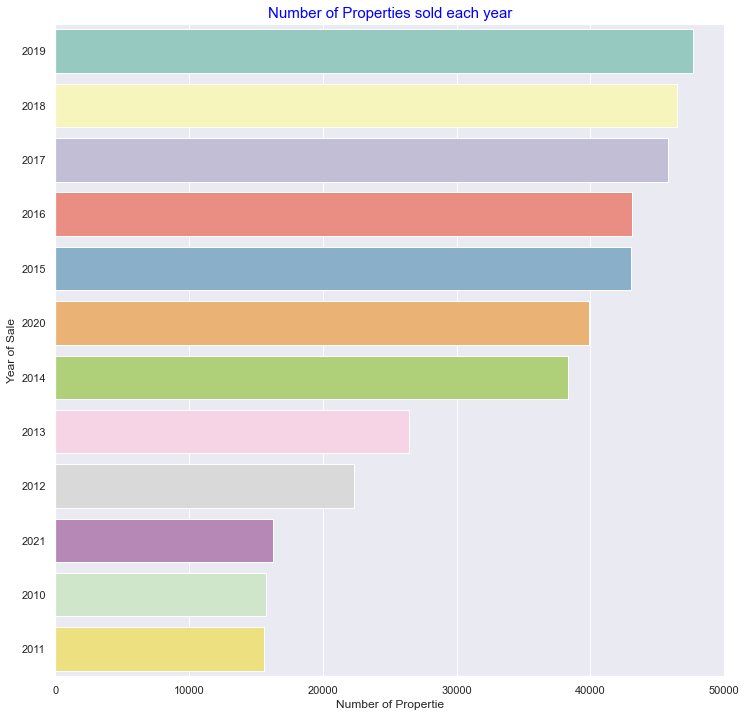

In [51]:
# Count of properties sold per year.

plt.figure(figsize=(12,12))
sns.set(style="darkgrid")
ax = sns.countplot(y="YEAR", data=Property_Market_2010_2021, palette=("Set3"), order=Property_Market_2010_2021['YEAR'].value_counts().index[0:15])
plt.title('Number of Properties sold each year', fontsize=15, color='Blue')
plt.ylabel('Year of Sale')
plt.xlabel('Number of Propertie')
plt.show()


In [52]:
Property_Market_2010_2021.COUNTY.count()
#trying to identify the number of counties, unsucessful 

400648

In [53]:
#Property_Market_2010_2021.['COUNTY'].count()

#trying to identify the number of counties, unsucessful 

In [54]:
Property_Market_2010_2021.COUNTY.nunique()
#26 counties identified, sucessful 

26

In [55]:
Property_Market_2010_2021.groupby(['YEAR'])['COUNTY'].count()
#Number of houses sold in Ireland per year 2010-2021

YEAR
2010    15786
2011    15583
2012    22320
2013    26408
2014    38316
2015    43011
2016    43142
2017    45762
2018    46470
2019    47659
2020    39930
2021    16261
Name: COUNTY, dtype: int64

In [56]:
Property_Market_2010_2021.groupby(['COUNTY'])['YEAR'].count()
#Number of houses sold per county 2010-2021


COUNTY
Carlow         4395
Cavan          6271
Clare          9790
Cork          44016
Donegal       11780
Dublin       125816
Galway        21173
Kerry         12316
Kildare       17173
Kilkenny       6673
Laois          6078
Leitrim        3665
Limerick      15869
Longford       3596
Louth         10189
Mayo          10332
Meath         13641
Monaghan       3147
Offaly         5224
Roscommon      6057
Sligo          6175
Tipperary     11797
Waterford     11197
Westmeath      8341
Wexford       14123
Wicklow       11814
Name: YEAR, dtype: int64

In [57]:
# count occurrences of number of properties sold per county
data1 = Property_Market_2010_2021.groupby(['COUNTY']).size()
 
# display occurrences
display(data1)
 
# count occurrences of number of properties sold per year
data2= Property_Market_2010_2021.groupby(['YEAR']).size()
 
# display occurrences 
display(data2)

COUNTY
Carlow         4395
Cavan          6271
Clare          9790
Cork          44016
Donegal       11780
Dublin       125816
Galway        21173
Kerry         12316
Kildare       17173
Kilkenny       6673
Laois          6078
Leitrim        3665
Limerick      15869
Longford       3596
Louth         10189
Mayo          10332
Meath         13641
Monaghan       3147
Offaly         5224
Roscommon      6057
Sligo          6175
Tipperary     11797
Waterford     11197
Westmeath      8341
Wexford       14123
Wicklow       11814
dtype: int64

YEAR
2010    15786
2011    15583
2012    22320
2013    26408
2014    38316
2015    43011
2016    43142
2017    45762
2018    46470
2019    47659
2020    39930
2021    16261
dtype: int64

Text(0.5, 0, 'Year of Sale')

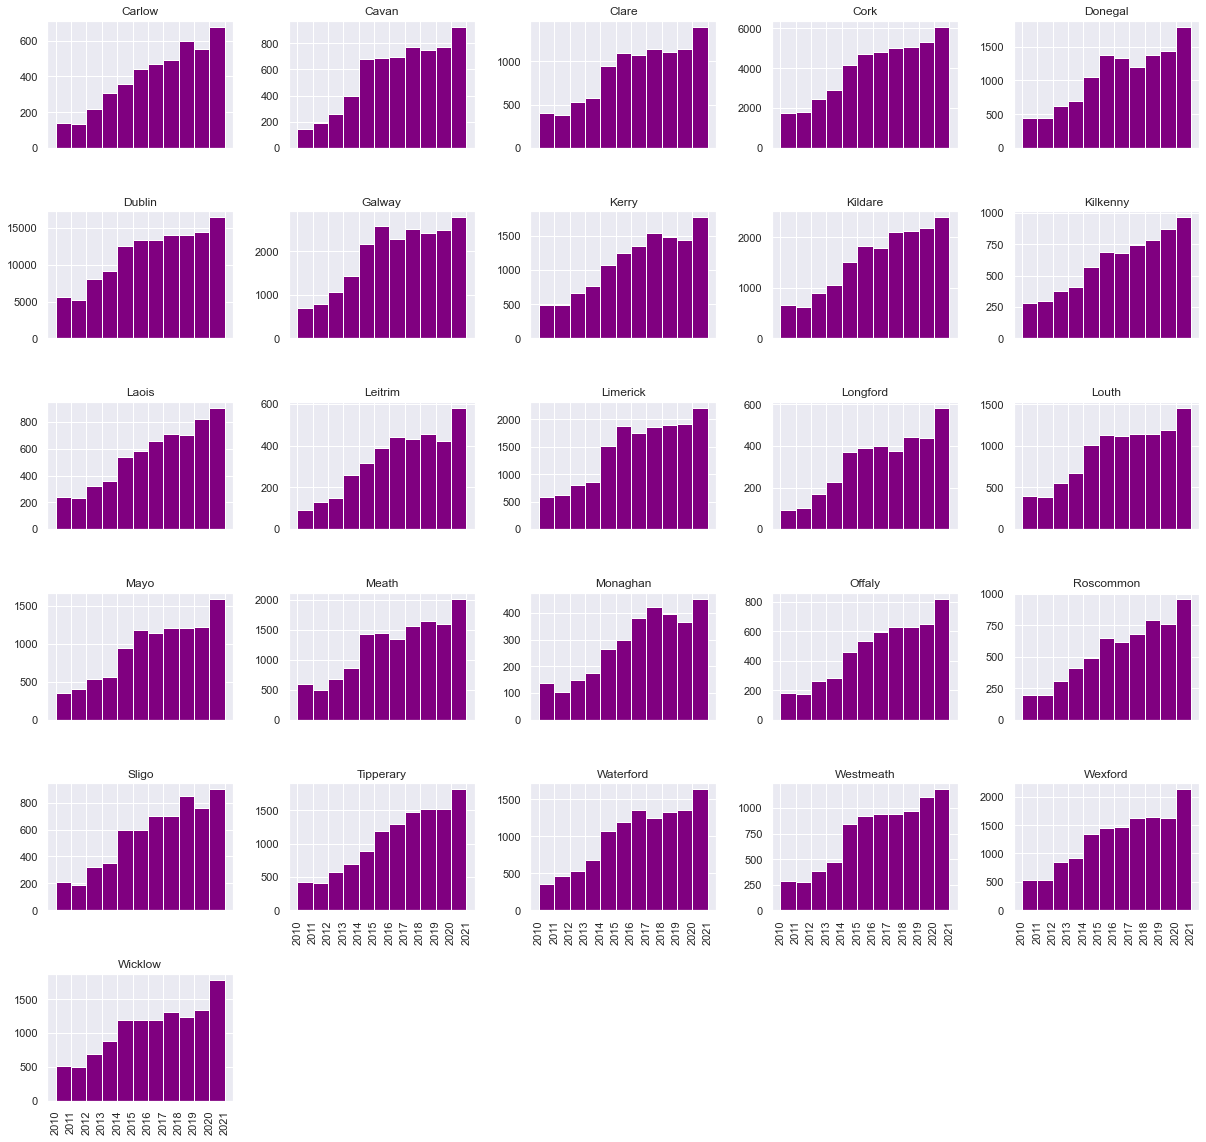

In [58]:
Property_Market_2010_2021.hist(column='YEAR', by='COUNTY', bins=11, grid=False, rwidth=3,
        color='purple', sharex=True, figsize = (20,20))
plt.xlabel('Year of Sale')

#Plot of all counties and the number of sales each year 

array([[<AxesSubplot:title={'center':'Carlow'}>,
        <AxesSubplot:title={'center':'Cavan'}>,
        <AxesSubplot:title={'center':'Clare'}>,
        <AxesSubplot:title={'center':'Cork'}>,
        <AxesSubplot:title={'center':'Donegal'}>],
       [<AxesSubplot:title={'center':'Dublin'}>,
        <AxesSubplot:title={'center':'Galway'}>,
        <AxesSubplot:title={'center':'Kerry'}>,
        <AxesSubplot:title={'center':'Kildare'}>,
        <AxesSubplot:title={'center':'Kilkenny'}>],
       [<AxesSubplot:title={'center':'Laois'}>,
        <AxesSubplot:title={'center':'Leitrim'}>,
        <AxesSubplot:title={'center':'Limerick'}>,
        <AxesSubplot:title={'center':'Longford'}>,
        <AxesSubplot:title={'center':'Louth'}>],
       [<AxesSubplot:title={'center':'Mayo'}>,
        <AxesSubplot:title={'center':'Meath'}>,
        <AxesSubplot:title={'center':'Monaghan'}>,
        <AxesSubplot:title={'center':'Offaly'}>,
        <AxesSubplot:title={'center':'Roscommon'}>],
       [<Axe

C:\Users\mcloukx1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mcloukx1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


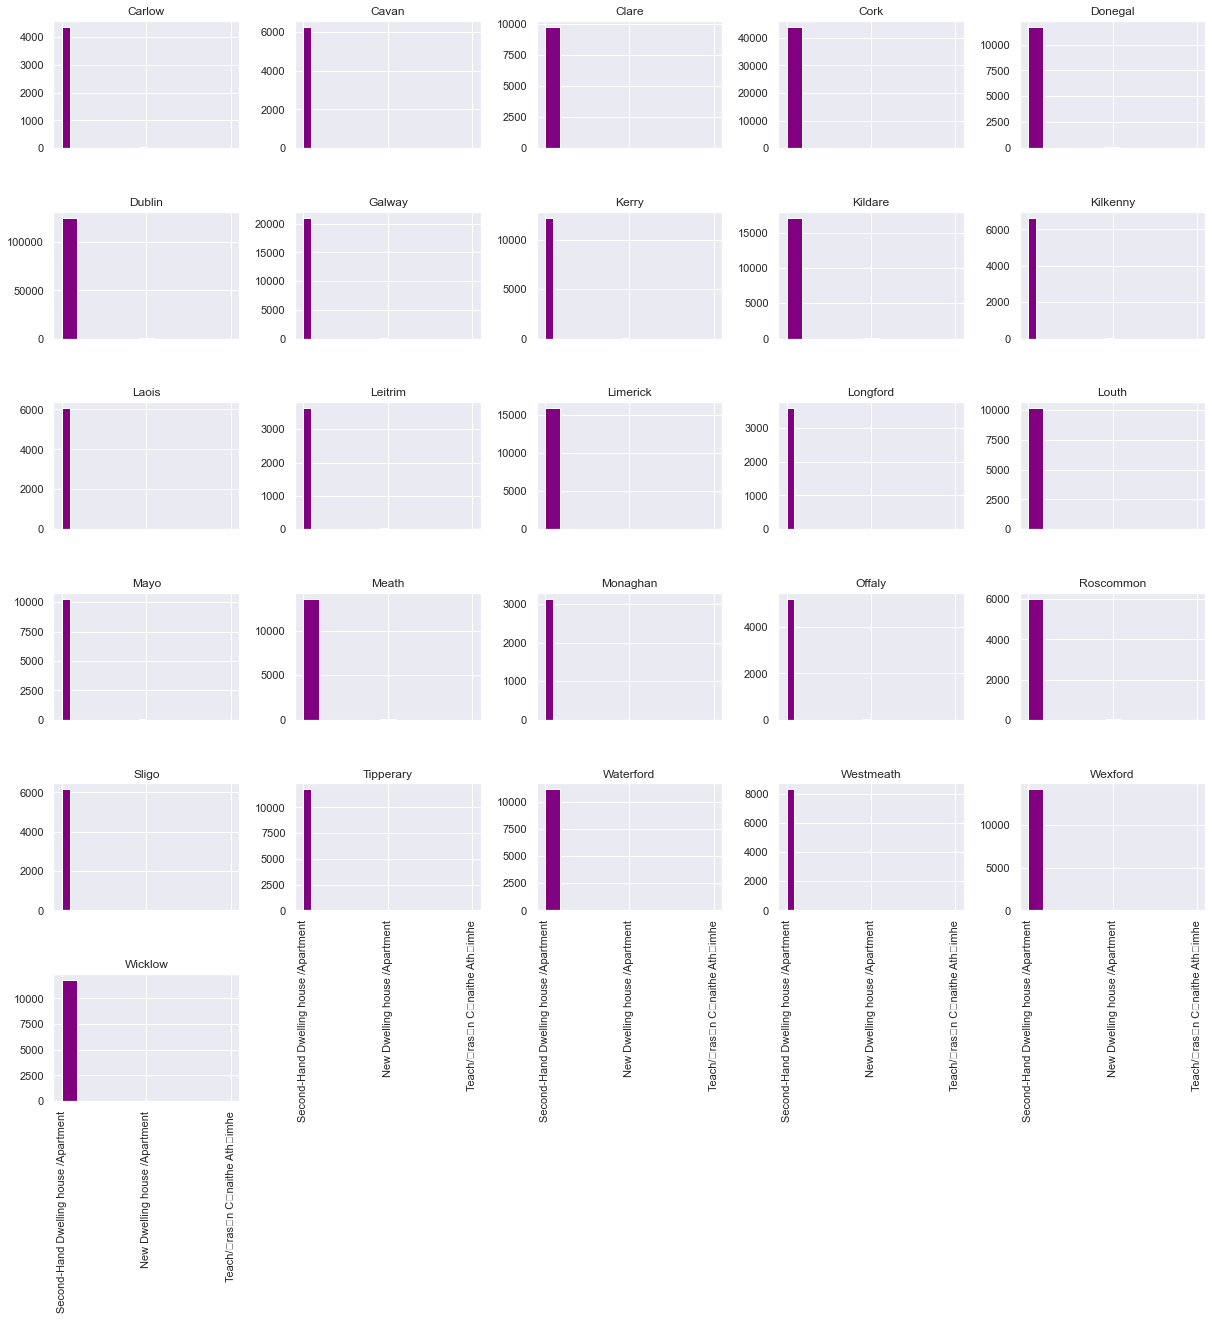

In [59]:
Property_Market_2010_2021.hist(column='PROPERTY_DESC', by='COUNTY', bins=11, grid=False, rwidth=3,
        color='purple', sharex=True, figsize = (20,20))


array([[<AxesSubplot:title={'center':'Carlow'}>,
        <AxesSubplot:title={'center':'Cavan'}>,
        <AxesSubplot:title={'center':'Clare'}>,
        <AxesSubplot:title={'center':'Cork'}>,
        <AxesSubplot:title={'center':'Donegal'}>],
       [<AxesSubplot:title={'center':'Dublin'}>,
        <AxesSubplot:title={'center':'Galway'}>,
        <AxesSubplot:title={'center':'Kerry'}>,
        <AxesSubplot:title={'center':'Kildare'}>,
        <AxesSubplot:title={'center':'Kilkenny'}>],
       [<AxesSubplot:title={'center':'Laois'}>,
        <AxesSubplot:title={'center':'Leitrim'}>,
        <AxesSubplot:title={'center':'Limerick'}>,
        <AxesSubplot:title={'center':'Longford'}>,
        <AxesSubplot:title={'center':'Louth'}>],
       [<AxesSubplot:title={'center':'Mayo'}>,
        <AxesSubplot:title={'center':'Meath'}>,
        <AxesSubplot:title={'center':'Monaghan'}>,
        <AxesSubplot:title={'center':'Offaly'}>,
        <AxesSubplot:title={'center':'Roscommon'}>],
       [<Axe

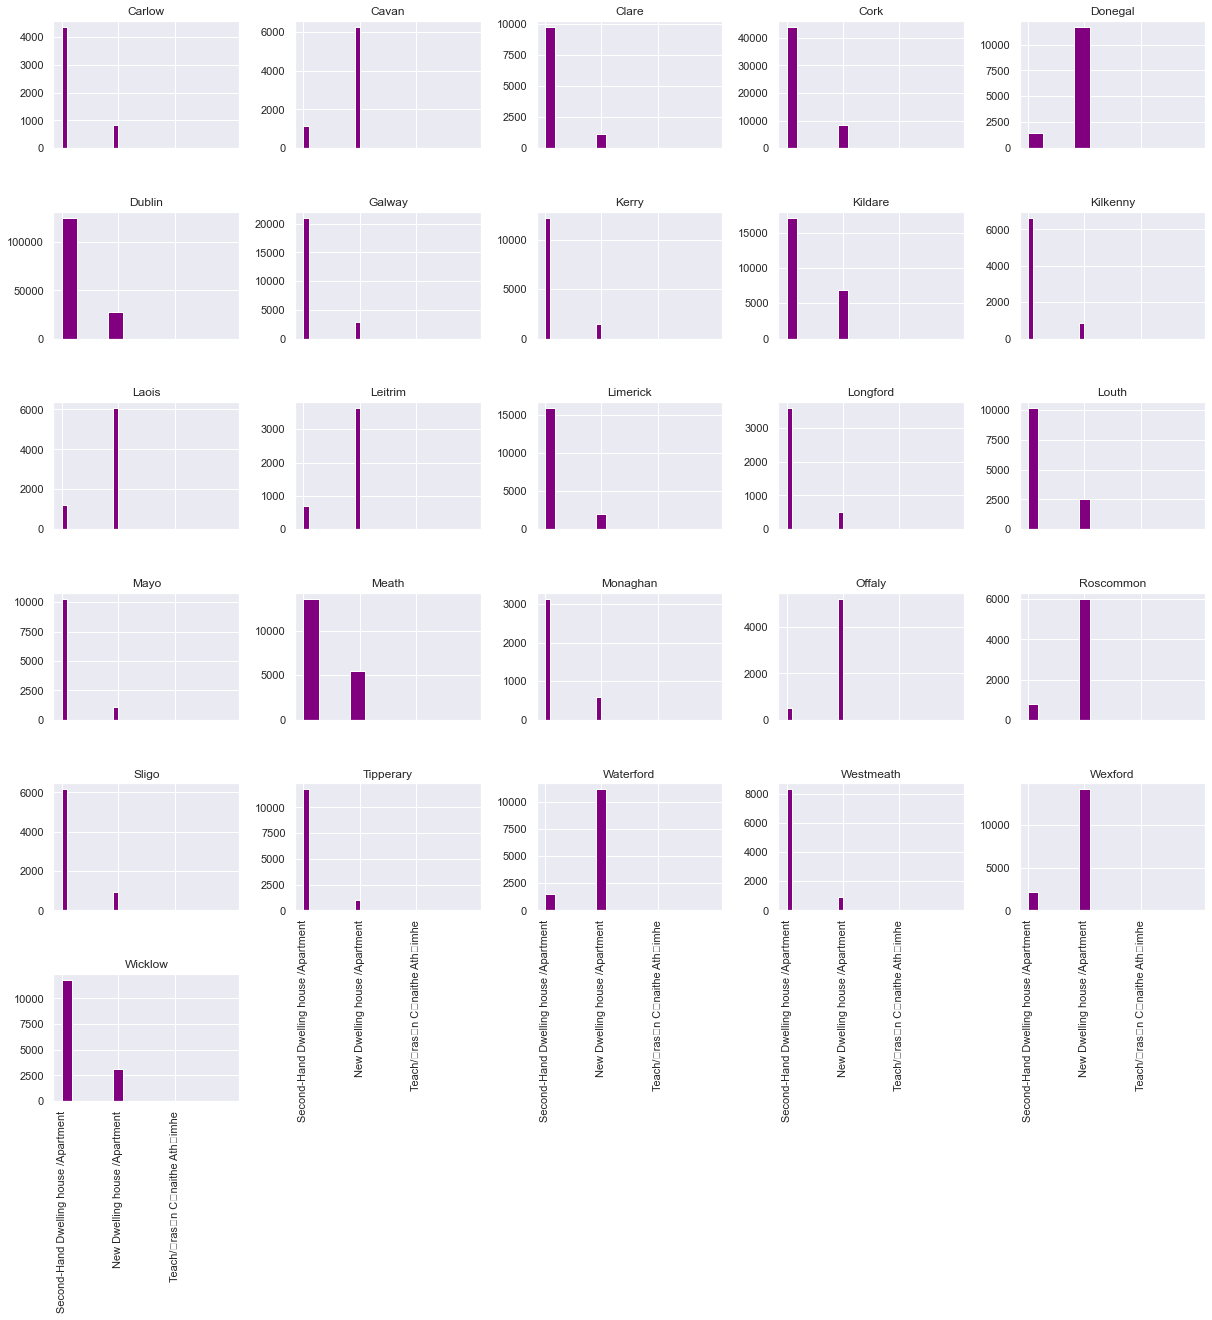

In [60]:
DS1.hist(column='PROPERTY_DESC', by='COUNTY', bins=11, grid=False, rwidth=3,
        color='purple', sharex=True, figsize = (20,20))


In [61]:
# count occurrences of number of properties sold per county
data3 = Property_Market_2010_2021.groupby(['PROPERTY_DESC']).size()
 
# display occurrences
display(data3)
 
# count occurrences of number of properties sold per year
data4= DS1.groupby(['PROPERTY_DESC']).size()
 
# display occurrences 
display(data4)

PROPERTY_DESC
New Dwelling house /Apartment              1578
Second-Hand Dwelling house /Apartment    399039
Teach/�ras�n C�naithe Ath�imhe               31
dtype: int64

PROPERTY_DESC
New Dwelling house /Apartment             77672
Second-Hand Dwelling house /Apartment    399039
Teach/?ras?n C?naithe Nua                     1
Teach/�ras�n C�naithe Ath�imhe               31
Teach/�ras�n C�naithe Nua                     2
dtype: int64

In [62]:
print(Property_Market_2010_2021[Property_Market_2010_2021.SALE_PRICE == Property_Market_2010_2021.SALE_PRICE.max()])
#Most expensive property sold in Irleand between 2010 and 2021

         SALE_DATE                                            ADDRESS  COUNTY  \
316169  22/06/2018  COMMERCIAL PROPERTY AND, 423 RESI UNITS AT CLA...  Dublin   

         SALE_PRICE  IF_MARKET_PRICE IF_VAT_EXCLUDED  \
316169  139165000.0                1               0   

                                PROPERTY_DESC  YEAR  SALE_PRICE_2  
316169  Second-Hand Dwelling house /Apartment  2018   157256450.0  


In [63]:
print(Property_Market_2010_2021[Property_Market_2010_2021.SALE_PRICE == Property_Market_2010_2021.SALE_PRICE.min()])
#Least expensive property sold in Irleand between 2010 and 2021

         SALE_DATE                     ADDRESS COUNTY  SALE_PRICE  \
358664  11/03/2019  COULAGHARD, EYERIES, BEARA   Cork     5030.53   

        IF_MARKET_PRICE IF_VAT_EXCLUDED  \
358664                0               0   

                                PROPERTY_DESC  YEAR  SALE_PRICE_2  
358664  Second-Hand Dwelling house /Apartment  2019     5684.4989  


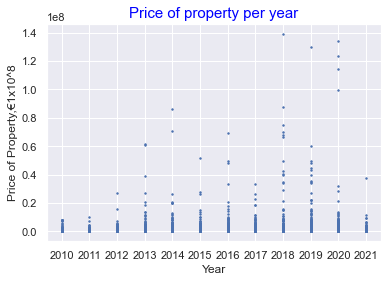

In [64]:
plt.scatter(Property_Market_2010_2021['YEAR'], Property_Market_2010_2021['SALE_PRICE'], s=2,)
plt.title('Price of property per year', fontsize=15, color='Blue', )
plt.ylabel('Price of Property,€1x10^8')
plt.xlabel('Year')
plt.show()
#year vs sale price 

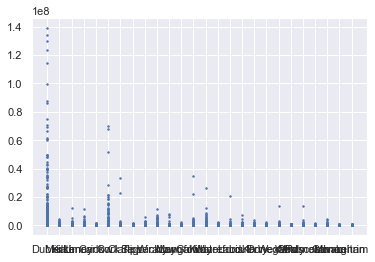

In [65]:
plt.scatter(Property_Market_2010_2021['COUNTY'], Property_Market_2010_2021['SALE_PRICE'], s=2)
plt.show()
#county vs sale price 
#unable to make out county names

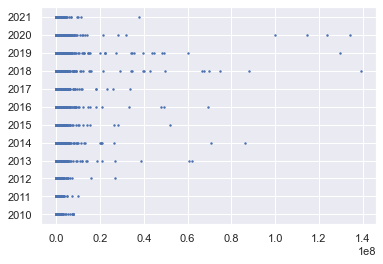

In [66]:
plt.scatter(Property_Market_2010_2021['SALE_PRICE'], Property_Market_2010_2021['YEAR'], s=2)
plt.show()
#county vs sale price 
#unable to make out county names
#year vs sale price 

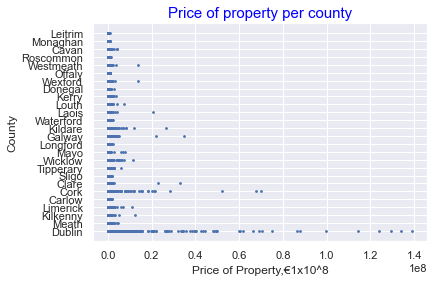

In [67]:
plt.scatter(Property_Market_2010_2021['SALE_PRICE'], Property_Market_2010_2021['COUNTY'], s=3)
plt.title('Price of property per county', fontsize=15, color='Blue', )
plt.ylabel('County')
plt.xlabel('Price of Property,€1x10^8')
plt.show()
#county vs sale price 
#unable to make out county names

In [68]:
Property_Market_2010_2021_grp = Property_Market_2010_2021.groupby('COUNTY').mean()['SALE_PRICE']
Property_Market_2010_2021_grp


COUNTY
Carlow       146967.201379
Cavan        118894.586916
Clare        156306.398979
Cork         223051.133320
Donegal      113453.599535
Dublin       407630.741103
Galway       201709.548998
Kerry        156230.503701
Kildare      255410.135523
Kilkenny     182124.482927
Laois        148643.724441
Leitrim      101174.021735
Limerick     163169.555191
Longford      96286.616363
Louth        176037.177507
Mayo         126305.414110
Meath        227936.540104
Monaghan     124524.916479
Offaly       138292.004121
Roscommon    103578.067629
Sligo        133071.825245
Tipperary    136474.900703
Waterford    152996.701445
Westmeath    151381.481294
Wexford      157383.550207
Wicklow      308684.894268
Name: SALE_PRICE, dtype: float64

In [69]:
#sns.scatterplot(x=Property_Market_2010_2021['YEAR'],y=Property_Market_2010_2021['SALE_PRICE'], data=Property_Market_2010_2021, hue='PROPERTY_DESC')

(array([3., 4., 3., 7., 1., 2., 1., 0., 2., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 1.]),
 array([ 96286.61636263, 111853.82259967, 127421.02883671, 142988.23507375,
        158555.44131079, 174122.64754783, 189689.85378487, 205257.06002191,
        220824.26625895, 236391.47249599, 251958.67873303, 267525.88497007,
        283093.09120711, 298660.29744415, 314227.50368119, 329794.70991823,
        345361.91615527, 360929.12239231, 376496.32862935, 392063.53486639,
        407630.74110343]),
 <BarContainer object of 20 artists>)

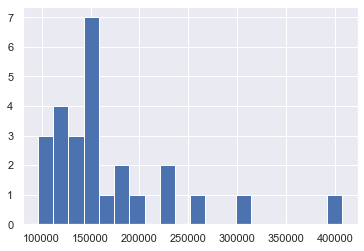

In [70]:
plt.hist(Property_Market_2010_2021_grp, bins = 20)


In [ ]:
sns.pairplot(Property_Market_2010_2021, hue='COUNTY')

In [ ]:
#sns.scatterplot(x='YEAR',y='SALE_PRICE'.mean(), data=Property_Market_2010_2021, hue='COUNTY')

In [ ]:
sns.lineplot(data=Property_Market_2010_2021, y='SALE_PRICE', x='YEAR', hue='COUNTY',)